In [23]:
import time as t
import random as rd
import copy
import sys
import matplotlib.pyplot as plt

## 1.a)Recursive formulation of the traffic lane problem: Identify the subproblems, observe the optimal substructure property and the overlapping computations, and then define the problem recursively.


The subproblems are, in every step, the shortest path to a specific lane column is known. In other words let there be n lanes l1, l2, l3, . . . ln and 3 columns c1, c2, c3. Then shortest path to specific ln comes from l(n-1). Then this path comes from l(n-2). Note that this is not a greedy algorithm since the shortest path from previous shortest path will be calculated. Always choosing the shortest path does not give valid solution yet, taking shortest path from previous cells and calculating the new shortest path gives the correct solution.

In [24]:
def updateShorter(currentLane, currentColumn, beforeLane, beforeColumn):
    if((currentColumn-beforeColumn>1) or (beforeColumn-currentColumn>1)):
        return None
    else:
        #print(currentLane, currentColumn, beforeLane, beforeColumn)
        if((currentLane[currentColumn]==1) or (beforeLane[beforeColumn]==1)):
            return None
        else:
            currentShortest=currentLane[currentColumn]
            if(currentLane[currentColumn]==0):
                if(currentColumn==beforeColumn):
                    currentLane[currentColumn]=beforeLane[beforeColumn]
                else:
                    currentLane[currentColumn]=beforeLane[beforeColumn]-1
            else:
                if(beforeColumn==currentColumn):
                    if(currentLane[currentColumn]<beforeLane[beforeColumn]):
                        currentLane[currentColumn]=beforeLane[beforeColumn]
                else:
                    if((beforeLane[beforeColumn]-1)>currentShortest):
                        currentLane[currentColumn]=beforeLane[beforeColumn]-1
                

In [25]:
def smallest(lane):
    if(lane.count(1)):
        lane.remove(1)
    if(len(lane)!=0):
        return max(lane)*-1
    else:
        return -1

In [26]:
def checkCollision(inputArray):
    for i in range(len(inputArray)-1):
        lane1=inputArray[i]
        lane2=inputArray[i+1]
        if((lane1==[0,1,1] and lane2==[1,1,0])or(lane2==[0,1,1] and lane1==[1,1,0])):
            return True
        if(lane1==[1,1,1] or lane2==[1,1,1]):
            return True
    return False

In [27]:
listOfInputs=[]
numberOfInputs=50
listOfInputNumbers=[]
maxNumberOfInputs=500
for i in range(maxNumberOfInputs):
    oneInput=[[0,0,0]]
    for j in range(numberOfInputs-1):
        for l in range(3):
            lane=[0,0,0]
            a=rd.randint(0,2)
            lane[a]=1
        oneInput.append(lane)
    listOfInputs.append(oneInput)
    listOfInputNumbers.append(numberOfInputs)
    numberOfInputs+=50
        


In [28]:
IterativeInput=copy.deepcopy(listOfInputs)
naiveInput=copy.deepcopy(listOfInputs)
RecursiveInput=copy.deepcopy(listOfInputs)

In [29]:
sys.setrecursionlimit(1500001)

## 1.b)
if(l==0)
    return road[0]
before=recursive(l-1)
current=road[l]
for c=0 ==> c=2
    for c2=0 ==> c2=2
        if shorter (current,c), (before, c2)
            update (current,c), (before, c2)

return current


I will take c's as constant 3
Also T(1)=1, T(0)=0
Time Complexity=T(n)=T(n-1)+O(20)
Assume that T(n)=kn for O(n)
then
T(n)=kn-k+20
which is smaller than kn for k>20
then T(n)=O(n)

Space complexity is O(n) since there is only one lane returned each recursion which has length of three integers. Then space complexity is O(n+3) which is O(n)

In [30]:
def naiveRecursive(inputArray, size):
    if(size==(len(inputArray)-1)):
        if(checkCollision(inputArray)):
            return -1
    if(size==0):
        inputArray[size][0]=-1
        inputArray[size][2]=-1
        return inputArray[size]
    before=naiveRecursive(inputArray, size-1)
    for c in range(0,3):
        for c2 in range (0,3):
            updateShorter(inputArray[size],c,before,c2)
    if(((len(inputArray)-1)!=size)):
        return inputArray[size]
    return smallest(inputArray[size])
    

## 1.c)
if l!= 0
    recursive(l-1)
    current=road[l]
    before=road[l-1]
    for c=0 ==> c=2
        for c2=0 ==> c2=2
            if shorter (current,c), (before, c2)
                update (current,c), (before, c2)
    if(current=last)
        return smallest(current)
        
Time complexity;
I will take c's as constant 3
Also T(1)=2, T(0)=0
T(n)=T(n-1)+O(16)
Assume that T(n)=kn for O(n)
Then
T(n)=kn-k+16 which is smaller than kn for k>16
Thus T(n)=O(n)

Space complexity is O(n) since no auxillary space is needed except the inputArray which has length of n

In [31]:
def Recursive(inputArray, size):
    if(size==(len(inputArray)-1)):
        if(checkCollision(inputArray)):
            return -1
    inputArray[0][0]=-1
    inputArray[0][2]=-1
    if(size!=0):
        Recursive(inputArray,size-1)
        current=inputArray[size]
        before=inputArray[size-1]
        for c in range(0,3):
            for c2 in range (0,3):
                updateShorter(current,c,before,c2)
        if(size==len(inputArray)-1):
            return smallest(current)
    


## 1.d)
for l=1 ==> l=n-1
    for c=0 ==> c=2
        for c2=0 ==> c2=2
            if shorter (l,c),(l-1,c2)
                update (l,c),(l-1,c2)
                
                
Time complexity;
Since max c is 3
Recursion is n*3*3*2 which is O(n)

Space complexity is also O(n) since there is no auxillary space is needed. Only for c's in every iteration which is O(n+9) which is O(n)

In [34]:
def Iterative(inputArray):
    if(checkCollision(inputArray)):
        return -1
    inputArray[0][0]=-1
    inputArray[0][2]=-1
    size=len(inputArray)
    for l in range(1,size):
        for c in range(0,3):
            for c2 in range (0,3):
                updateShorter(inputArray[l],c,inputArray[l-1],c2)
    return smallest(inputArray[size-1])

In [35]:
timesOfIterativeInput=[]

for i in range(len(IterativeInput)):
    firstTime=t.time()
    Iterative(IterativeInput[i])
    timesOfIterativeInput.append(t.time()-firstTime)

In [36]:
timesOfNaiveInput=[]
for i in range(len(naiveInput)):
    firstTime=t.time()
    naiveRecursive(naiveInput[i],len(naiveInput[i])-1)
    timesOfNaiveInput.append(t.time()-firstTime)

In [37]:
timesOfRecursiveInput=[]
for i in range(len(RecursiveInput)):
    firstTime=t.time()
    Recursive(RecursiveInput[i],len(RecursiveInput[i])-1)
    timesOfRecursiveInput.append(t.time()-firstTime)

In [38]:
#naiveRecursive(naiveInput[0],len(naiveInput[0]))

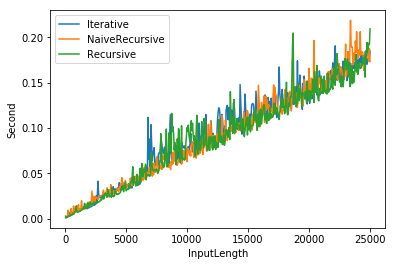

In [39]:
plt.plot(listOfInputNumbers, timesOfIterativeInput, label="Iterative")
plt.plot(listOfInputNumbers, timesOfNaiveInput, label="NaiveRecursive")
plt.plot(listOfInputNumbers, timesOfRecursiveInput, label="Recursive")
plt.xlabel("InputLength")
plt.ylabel("Second")
plt.legend()
plt.show()

## 1.e) This is a randomized input. It is expected that Recursive version will be the best one since it uses neither extra space nor extra iteration in one loop. Yet it is unexpected for me that NaiveRecursive is sometimes worse than Iterative and vice-versa. But it clearly seems that Recursive one is always best compared to these 2 with no risk.

In [40]:
whiteBoxForIterative=copy.deepcopy(listOfInputs)
whiteBoxSecondIterative=copy.deepcopy(listOfInputs)
for i in range(len(whiteBoxForIterative)):
        randomLane=rd.randint(1,len (whiteBoxForIterative[i]))
        whiteBoxForIterative[i][randomLane]=[1,1,1]
for i in range(len(whiteBoxSecondIterative)):
        randomLane=rd.randint(2,len(whiteBoxSecondIterative[i])-1)
        whiteBoxSecondIterative[i][randomLane]=[1,1,0]
        whiteBoxSecondIterative[i][randomLane-1]=[0,1,1]

In [41]:
whiteBoxForNaive=copy.deepcopy(listOfInputs)
whiteBoxSecondNaive=copy.deepcopy(listOfInputs)
for i in range(len (whiteBoxForNaive)):
        randomLane=rd.randint(1,len (whiteBoxForNaive[i]))
        whiteBoxForNaive[i][randomLane]=[1,1,1]
for i in range(len (whiteBoxSecondNaive)):
        randomLane=rd.randint(2,len (whiteBoxSecondNaive[i])-1)
        whiteBoxSecondNaive[i][randomLane]=[1,1,0]
        whiteBoxSecondNaive[i][randomLane-1]=[0,1,1]

In [42]:
whiteBoxForRecursive=copy.deepcopy(listOfInputs)
whiteBoxSecondRecursive=copy.deepcopy(listOfInputs)
for i in range(len (whiteBoxForRecursive)):
        randomLane=rd.randint(1,len (whiteBoxForRecursive[i]))
        whiteBoxForRecursive[i][randomLane]=[1,1,1]
for i in range(len (whiteBoxSecondRecursive)):
        randomLane=rd.randint(2,len (whiteBoxSecondRecursive[i])-1)
        whiteBoxSecondRecursive[i][randomLane]=[1,1,0]
        whiteBoxSecondRecursive[i][randomLane-1]=[0,1,1]

In [43]:
#Iterative White Box Testing
for i in whiteBoxForIterative:
    print(Iterative(i))
for i in whiteBoxSecondIterative:
    print(Iterative(i))

-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-

In [44]:
#Naive Recursion White Box Testing
for i in whiteBoxForNaive:
    print(naiveRecursive(i,len(i)-1))
for i in whiteBoxSecondNaive:
    print(naiveRecursive(i, len(i)-1))

-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-

In [45]:
#Recursion White Box Testing
for i in whiteBoxForRecursive:
    print(Recursive(i,len(i)-1))
for i in whiteBoxSecondRecursive:
    print(Recursive(i, len(i)-1))

-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-